In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
from plotter import *
import glob, os
import seaborn as sb

In [2]:
def get_objective(conn):
    """
    Retrieves the objective function
    """
    cursor = conn.cursor()
    command = "SELECT * FROM Output_Objective"
    cursor.execute(command)
    obj_value = cursor.fetchall()[0][-1]
    
    return obj_value

In [3]:
pygen_inp = glob.glob('simulations/illinois/zero_nuclear_RE_sensitivity/*.py')
print(len(pygen_inp))

100


In [4]:
path = 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/*.sqlite'
data_files = glob.glob(path, recursive=True)
data_files.sort()
data_files.append('simulations/illinois/zero_nuclear/IL_ZN_CC30_52.sqlite')
data_files

['simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S0_W0_52.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S0_W1_52.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S0_W2_52.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S0_W3_52.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S0_W4_52.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S0_W5_52.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S0_W6_52.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S0_W7_52.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S0_W8_52.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S0_W9_52.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/data_files/IL_ZN_S1_W0_52.sqlite',
 'simulations/illinois/zero_nuclear_RE_sensitivity/dat

In [5]:
region = 'IL'
comm = 'ELC'
frames = []
for file in data_files:
    conn = sqlite3.connect(file)
    df = get_annual_capacity(conn, region, comm)
    final_year = df[df.index==2050]
    final_year['Objective_Value'] = get_objective(conn)
    frames.append(final_year)
df = pd.concat(frames)

<ipython-input-5-310931bd8ef3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_year['Objective_Value'] = get_objective(conn)


In [6]:
df.fillna(0, inplace=True)
df

,BIOMASS,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,Objective_Value
year,,,,,,,,
2050,9262.4982,2255.6,41543.068,688.8,0.0,83610.857,54155.350,175088.403022
2050,3080.2514,2255.6,37017.654,688.8,0.0,90082.876,60959.536,165874.167996
2050,2157.2584,2255.6,61585.434,688.8,0.0,127522.470,31751.681,170334.328278
2050,3836.4983,2255.6,46995.511,688.8,0.0,77599.013,58273.852,167081.216337
2050,6712.4746,2255.6,35957.330,688.8,0.0,55416.609,74698.678,172996.306221
...,...,...,...,...,...,...,...,...
2050,7719.4999,2255.6,40158.025,688.8,0.0,103742.490,44703.090,172316.508795
2050,4290.2344,2255.6,51428.567,688.8,0.0,119113.830,35505.435,169247.949009
2050,2114.4612,2255.6,40636.225,688.8,0.0,81399.795,62697.697,164002.454648


In [7]:
df.describe()

,BIOMASS,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,Objective_Value
count,101.000000,1.010000e+02,101.000000,1.010000e+02,101.0,101.000000,101.000000,101.000000
mean,5806.651911,2.255600e+03,42645.407743,6.888000e+02,0.0,84998.035396,54940.645693,169163.794690
std,2996.588314,4.113139e-12,7688.751715,1.371046e-12,0.0,16646.037628,10176.847546,4418.529967
min,971.362580,2.255600e+03,26407.809000,6.888000e+02,0.0,45216.069000,31751.681000,158433.027872
25%,3287.972300,2.255600e+03,38564.231000,6.888000e+02,0.0,75471.883000,48799.583000,165887.929100
50%,5695.276700,2.255600e+03,41543.068000,6.888000e+02,0.0,84583.064000,54419.584000,168727.353455
75%,7560.998600,2.255600e+03,45607.482000,6.888000e+02,0.0,96595.562000,59983.750000,172486.110266
max,13604.693000,2.255600e+03,67612.171000,6.888000e+02,0.0,127522.470000,78602.528000,178501.462011


In [8]:
techs = list(df.columns[:-1])

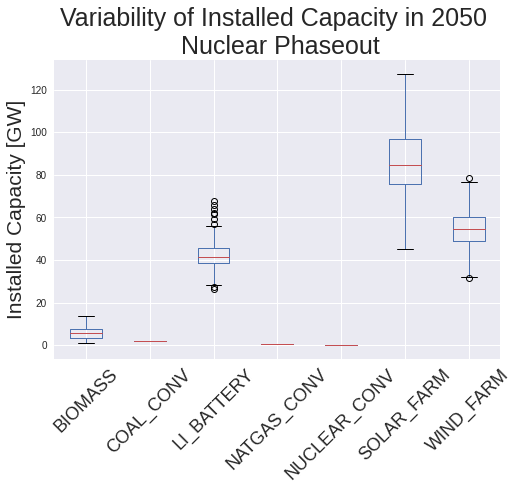

In [9]:
plt.style.use('seaborn')
plt.figure.figsize = (12,9)
(df[techs]/1000).boxplot()

plt.title('Variability of Installed Capacity in 2050 \n Nuclear Phaseout', fontsize=25)
plt.ylabel('Installed Capacity [GW]', fontsize=21)
plt.xticks(fontsize=18, rotation=45)
plt.show()

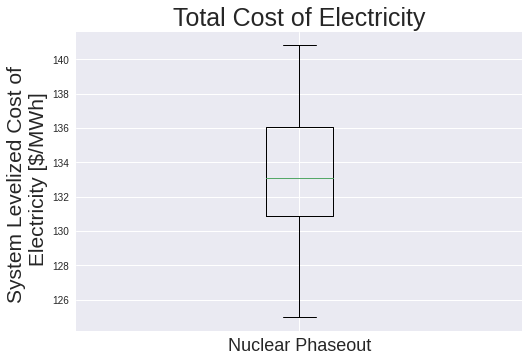

In [10]:
demand = 1267698.8
plt.style.use('seaborn')
plt.figure.figsize = (12,9)
plt.boxplot(df['Objective_Value']/demand*1000)

plt.title('Total Cost of Electricity', fontsize=25)
plt.ylabel('System Levelized Cost of \n Electricity [$/MWh]', fontsize=21)
plt.xticks([1],['Nuclear Phaseout'],fontsize=18)
plt.show()

In [11]:
df = df.reset_index().drop(columns='year')

In [12]:
(df['Objective_Value']).to_csv('data/objective_value_ZN.csv')

<AxesSubplot:>

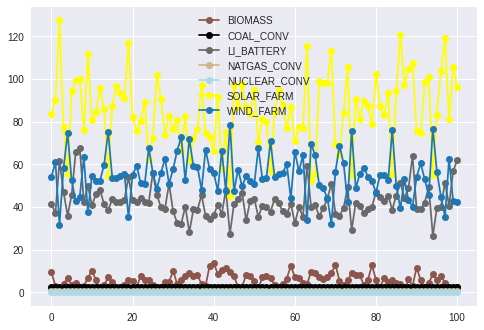

In [13]:
(df[techs]/1000).plot(marker='o', color=elc_colors)

The plot above suggests that biomass is useful when there is slightly less penetration of VREs. Biomass serves as baseload power and is relatively inflexible.

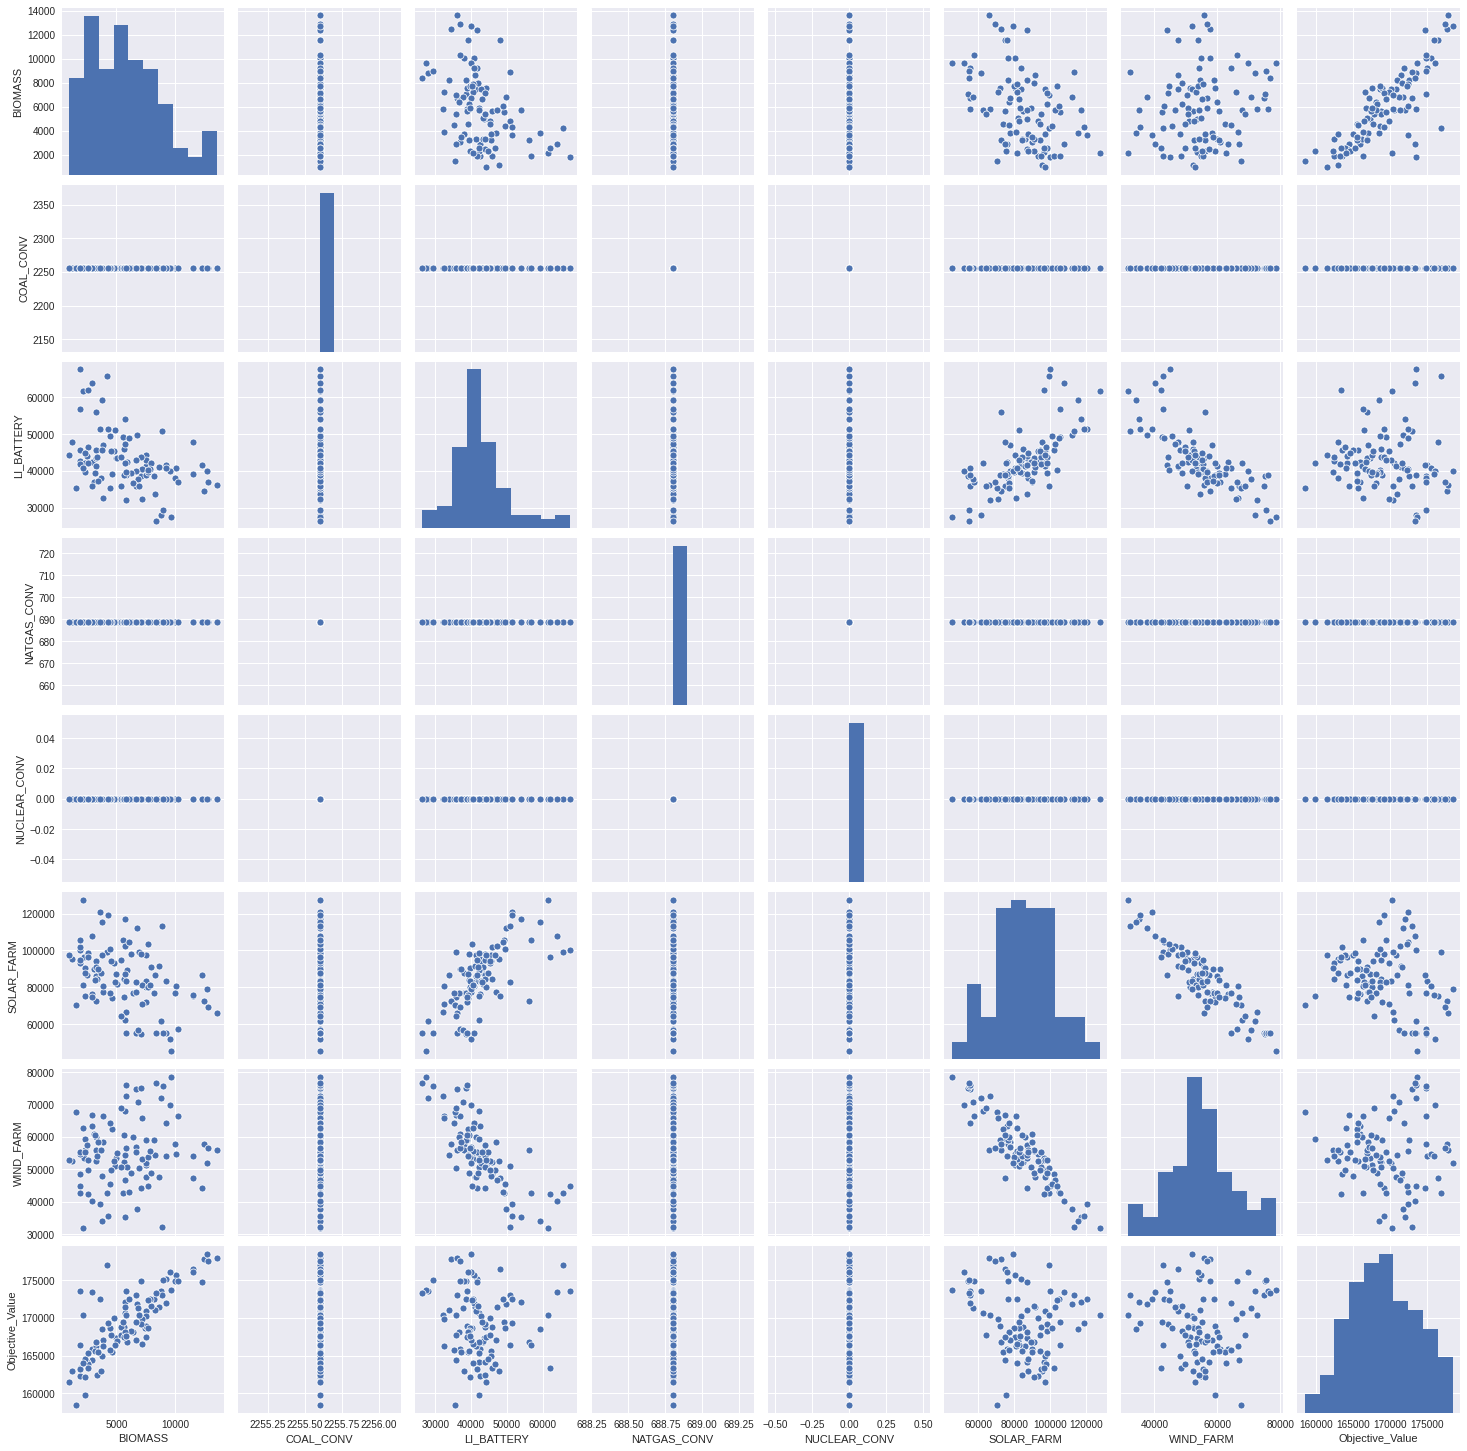

In [14]:
sb.pairplot(df)

In [15]:
conn = sqlite3.connect(data_files[0])
fulldf = get_annual_capacity(conn, region, comm)
for i,file in enumerate(data_files):
    if i == 0:
        continue
    conn = sqlite3.connect(file)
    inter_df = get_annual_capacity(conn, region, comm)
    frames = [fulldf, inter_df]
    fulldf = pd.concat(frames)

In [16]:
fulldf.fillna(0, inplace=True)
fulldf

,BIOMASS,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM
year,,,,,,,
2025,0.0000,7505.90,128.100,16371.60,12415.10,4353.1357,7780.1456
2030,6744.4096,5045.24,15127.598,16332.70,9387.20,33771.1740,29520.7490
2035,7472.3138,2815.74,17998.442,15903.98,8377.90,39619.5990,33862.3590
2040,7472.3138,2444.40,21862.046,5023.32,7909.90,50370.8000,34585.6480
2045,8506.5812,2357.04,33729.085,688.80,2415.16,73501.8820,47669.0210
...,...,...,...,...,...,...,...
2030,2359.0067,5045.24,28834.851,16332.70,9387.20,46897.8320,20674.3610
2035,2359.0067,2815.74,33849.177,15903.98,8377.90,54554.7910,24031.7680
2040,2359.0067,2444.40,37643.531,5023.32,7909.90,60298.6080,26541.5480


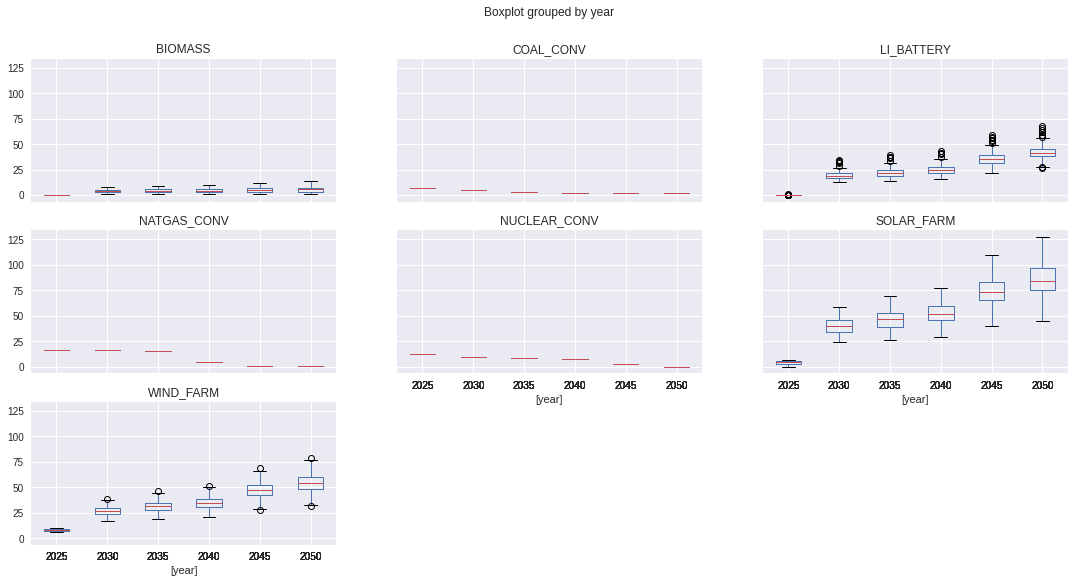

In [17]:
(fulldf/1000).boxplot(by='year', figsize=(18,9))
plt.xlabel('Installed Capacity [GW]')
plt.show()

In [18]:
conn = sqlite3.connect('simulations/illinois/zero_nuclear/IL_ZN_CC30_52.sqlite')

In [19]:
get_objective(conn)

163307.48896325292

In [20]:
(df[techs]/1000).to_csv('data/results/installed_capacity_2050_ZN.csv')
(fulldf[techs]/1000).to_csv('data/results/installed_capacity_full_ZN.csv')